# New York City Airbnb Open Data
## Airbnb listings and metrics in NYC, NY, USA (2019)

### Context:
This dataset describes the listing activity and metrics in NYC, NY for 2019.


## Importing libraries
Here we are importing all the libraries required for EDA and pre-processing.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/AB_NYC_2019.csv')
df_copy = df.copy()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Understanding the dataset

In [5]:
#+--------------------------------+------------------------------------------------------+
#| 1. id                             | listing id                                           |
#+--------------------------------+------------------------------------------------------+
#| 2. name                           | name of the listing                                  |
#+--------------------------------+------------------------------------------------------+
#| 3. host_id                        | host ID                                              |
#+--------------------------------+------------------------------------------------------+
#| 4. host_name                      | name of the host                                     |
#+--------------------------------+------------------------------------------------------+
#| 5. neighbourhood_group            | location                                             |
#+--------------------------------+------------------------------------------------------+
#| 6. neighbourhood                  | area                                                 |
#+--------------------------------+------------------------------------------------------+
#| 7. latitude                       | latitude coordinates                                 |
#+--------------------------------+------------------------------------------------------+
#| 8. longitude                      | longitude                                            |
#+--------------------------------+------------------------------------------------------+
#| 9. room_type                      | listing space type                                   |
#+--------------------------------+------------------------------------------------------+
#| 10. price                          | price in dollars                                     |
#+--------------------------------+------------------------------------------------------+
#| 11. minimum_nights                 | amount of nights minimum                             |
#+--------------------------------+------------------------------------------------------+
#| 12. number_of_reviews              | number of reviews                                    |
#+--------------------------------+------------------------------------------------------+
#| 13. last_review                    | latest review                                        |
#+--------------------------------+------------------------------------------------------+
#| 14. reviews_per_month              | number of reviews per month                          |
#+--------------------------------+------------------------------------------------------+
#| 15. calculated_host_listings_count | amount of listing per host                           |
#+--------------------------------+------------------------------------------------------+
#| 16. availability_365               | number of days when listing is available for booking |
#+--------------------------------+------------------------------------------------------+

## Data Wrangling, Cleaning and Visualizations

In [6]:
# Understanding types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we have almost 48.8k rows with 16 columns for each. It is composed of 3 float types, 7 int types and 6 object types.

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

So, we can see there are around 10k null values in the last_review and review_per_month columns and a very few null values in name and host_name.

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


-> From this we can see the mean price to be around 152 dollars. 

-> Average availablity of an airbnb around a year is 112 days.


In [9]:
# Insight about unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

Notable that we have 5 locations in dataset and 3 room types.

In [10]:
# Making sure if any duplicatd values.
df.duplicated().sum()

0

We do not have any duplicate rows in our dataset.

## Univariate Analysis

### Host ID

In [11]:
df.host_id.value_counts().iloc[:5]

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64

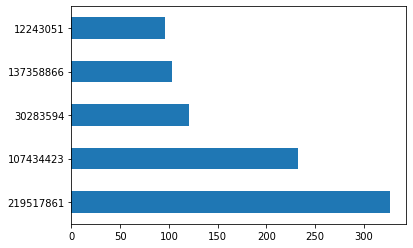

In [12]:
df.host_id.value_counts().iloc[:5].plot(kind = 'barh')

We can observe that the highest times transaction done by a customer is 327 in the year 2019.

### Room Type

In [13]:
# we noted that the room_type is only of 3 particular types.
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

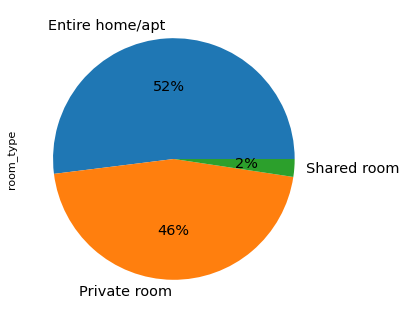

In [14]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

Intresting to note that in our dataset, around 25k people (52%) choose to use a house while 22k(46%) for a private room. Only 1k(2%) people choose a shared room. This could mean more people who use airbnb , use it with family maybe for tours,visits,etc... 

### Neighbourhood Groups - Location

In [15]:
# There are 5 particular neighbourhood_group, which means 5 unique locations.
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

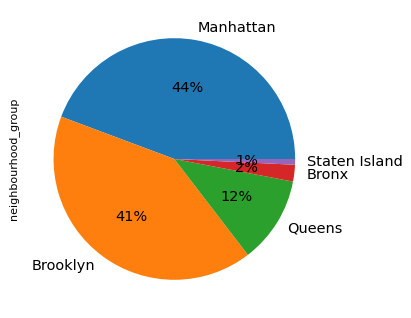

In [16]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

Manhattan is the city where most Airbnb transactions have occured with 44% of entire dataset. The least happend in Staten Island only 1%. Brooklyn consisted on 41% of transactions with 12% Queens and 2 % in Bronx.

### Neighbourhoods:

In [17]:
df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [18]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

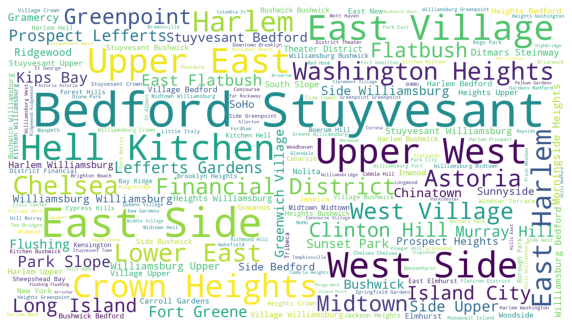

In [19]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(df_copy.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

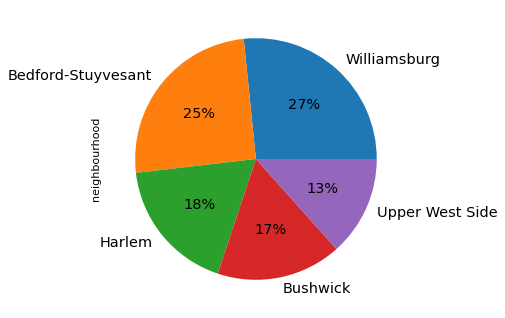

In [20]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

We can see that Williamsburg is the hottest area of transaction followed by Bedford-Stuyvesant.

This pie-chart shows the top 5 areas by percentage in the dataset.

### Price:

In [21]:
df.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

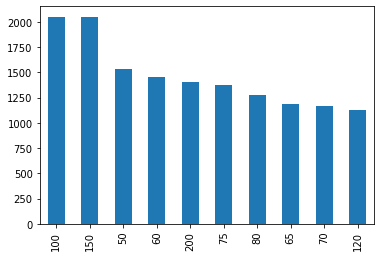

In [22]:
df.price.value_counts().iloc[:10].plot(kind = 'bar')

Almost 2k+ airbnb's has a price of 100 dollars and 150 dollars each respectively.

1.5k airbnb's have around 50 dollars price.

In [23]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64



The average pricing is around 152 dollars.

50% of data has price greater than 106 dollars.

The costliest airbnb has around 10k dollars as price.

In [24]:
df[df['price'] == 10000.000000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83




We have 3 airbnbs with 10k per night luxury stay, one private room and 2 home stay.

### Minimum Nights

In [25]:
df['minimum_nights'].value_counts()

1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64

In [26]:
for i in range(1,11):
  print("Number of nights: ",i)
  print("Amount of trasactions:",len(df[df['minimum_nights'] == i]))

Number of nights:  1
Amount of trasactions: 12720
Number of nights:  2
Amount of trasactions: 11696
Number of nights:  3
Amount of trasactions: 7999
Number of nights:  4
Amount of trasactions: 3303
Number of nights:  5
Amount of trasactions: 3034
Number of nights:  6
Amount of trasactions: 752
Number of nights:  7
Amount of trasactions: 2058
Number of nights:  8
Amount of trasactions: 130
Number of nights:  9
Amount of trasactions: 80
Number of nights:  10
Amount of trasactions: 483


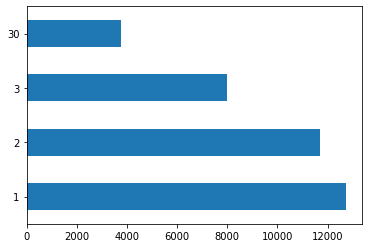

In [27]:
df['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')

We can observe that most of almost 12k people used 1 night stay in airbnb.

11k people choose 2 night stay while 7k choose 3 night stay.

Almost 3.7k stayed upto a month.

### Number of reviews

In [28]:
df['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

10k airbnbs dont have any reviews.

5.2k has around 1 review and the maximum number of reviews is 607 which only 1 airbnb has.

In [29]:
df[df['number_of_reviews'] == 607]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293




Great Bedroom in Manhattan gets the highest reviews and it costs around 69 dollars.





 

### Availablity

In [30]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

Around 1.3k airbnbs have 365 days availablity and rest doesnt.


In [31]:
df[df['availability_365'] == 365].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.295000e+03,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.00000,1295.000000,841.000000,1295.000000,1295.0
mean,1.940195e+07,8.554698e+07,40.729014,-73.943275,250.769884,19.60000,10.220849,0.832545,13.158301,365.0
std,1.197265e+07,8.786960e+07,0.057781,0.059799,550.497373,65.05093,22.095983,1.112493,36.224171,0.0
min,2.539000e+03,2.787000e+03,40.507080,-74.242850,20.000000,1.00000,0.000000,0.010000,1.000000,365.0
25%,8.725256e+06,8.931349e+06,40.687990,-73.983210,72.000000,1.00000,0.000000,0.130000,1.000000,365.0
50%,2.065068e+07,4.634351e+07,40.730990,-73.954270,125.000000,3.00000,2.000000,0.410000,2.000000,365.0
75%,3.027040e+07,1.565055e+08,40.762095,-73.921715,225.000000,30.00000,10.000000,1.000000,7.000000,365.0
max,3.648315e+07,2.733930e+08,40.893740,-73.721730,9999.000000,1250.00000,183.000000,8.940000,327.000000,365.0



Costliest airbnb with 365 days availablity costs around 10k dollars with average of 250 dollars.

### Reviews per month

In [32]:
df[df['reviews_per_month'] > 1].value_counts().sum()                 

15901

15.9k reviews were above 1.


In [33]:
df[df['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]            

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

Above 1, around 406 airbnbs have 2 reviews per month, 222 with 3 and 130 with 4.



In [34]:
df['reviews_per_month'].max()

58.5

In [35]:
df_copy[df['reviews_per_month'] == 58.5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299




Enjoy great views in Manhattan has the highest reviews per month. They offer Private room and is worth 100 dollars a night. 



### Calculate host listing

In [36]:
df.calculated_host_listings_count.value_counts().iloc[:5]

1    32303
2     6658
3     2853
4     1440
5      845
Name: calculated_host_listings_count, dtype: int64

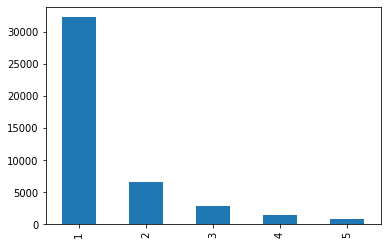

In [37]:
df.calculated_host_listings_count.value_counts().iloc[:5].plot(kind = 'bar')

Most hosts used the listings only once that is around 32.3k and 6.6k around 2 times.


In [38]:
df.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


On an average, a host has used listings 7 times.

Maximum times being 327.

### Bivariate Analysis

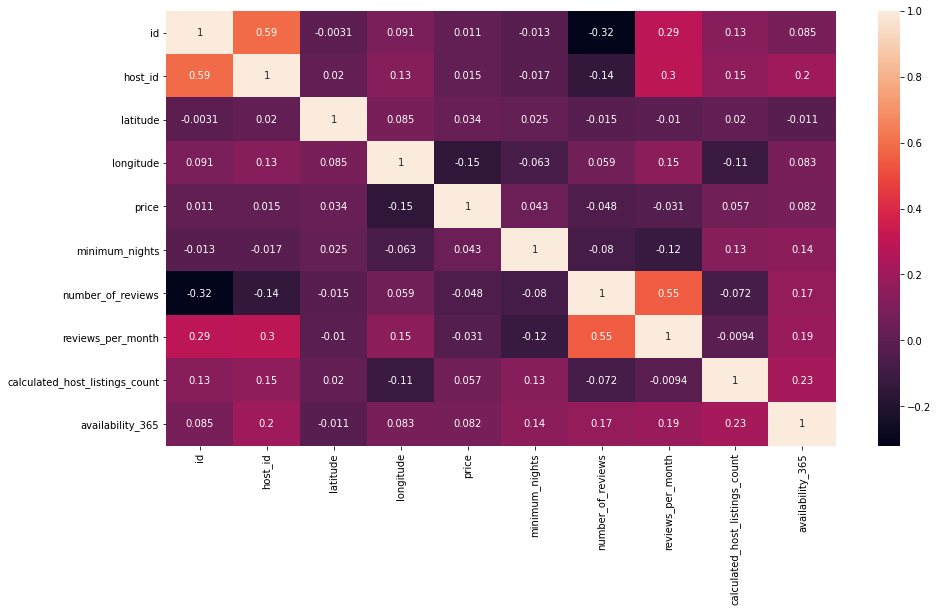

In [39]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

### Maps - Scatterplots

#### Latitude and Longitude with loaction

In [40]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


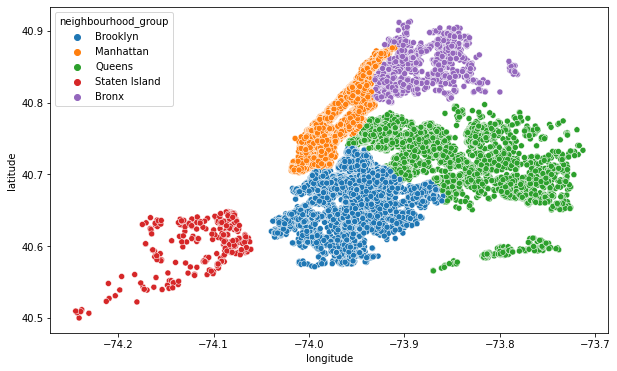

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)

This shows us the dataset distribution in NewYork city with respect to latitude and longitude.

#### Latitude and Longitude with room type

In [42]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


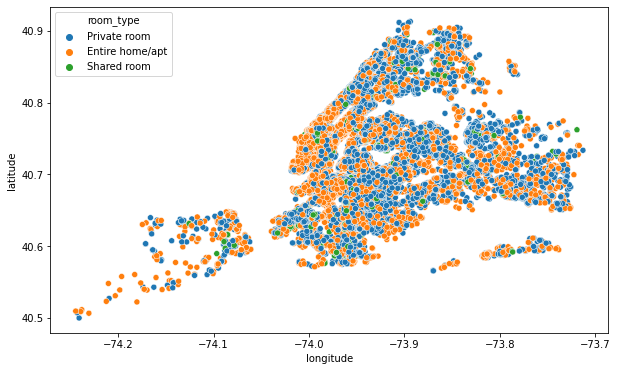

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)

#### Latitude and Longitude with room availablity for 365 days

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


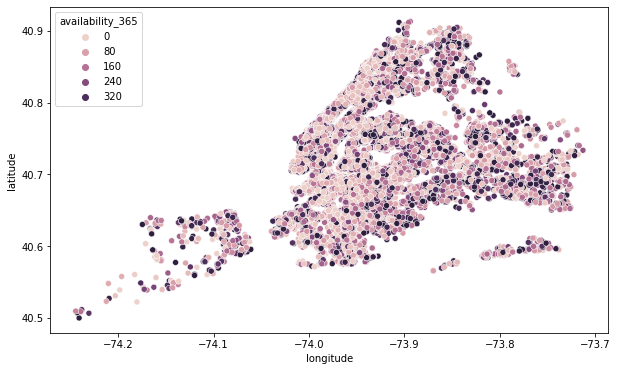

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_copy.longitude,df_copy.latitude,hue=df_copy.availability_365)

### Plots

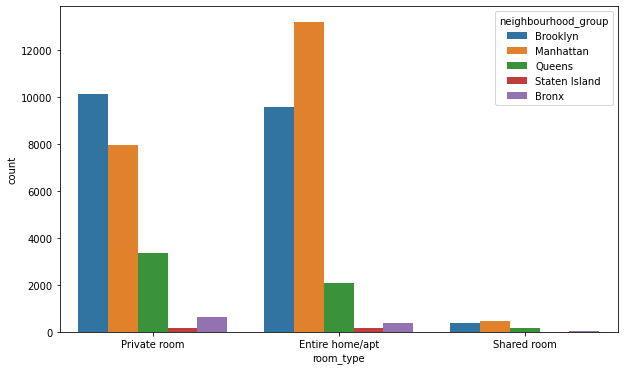

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

Home service seems to be most used by people and the highest in Manhattan. This is also the highest service used across New York City.

In Brooklyn, Private rooms were more used.



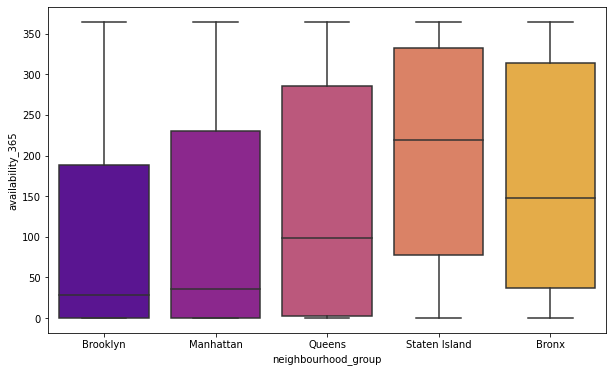

In [46]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df_copy, x='neighbourhood_group',y='availability_365',palette='plasma')

Staten Island has th highest average airbnb availablity. 

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

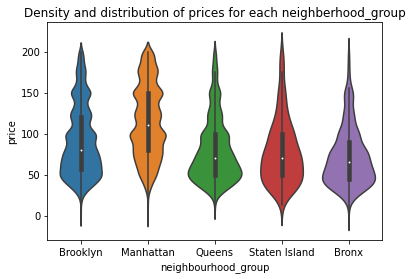

In [47]:
v2=sns.violinplot(data=df[df.price < 200], x='neighbourhood_group', y='price')
v2.set_title('Density and distribution of prices for each neighberhood_group')

Manhattan airbnb's has the highest average price.




In [48]:
df['neighbourhood'].value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

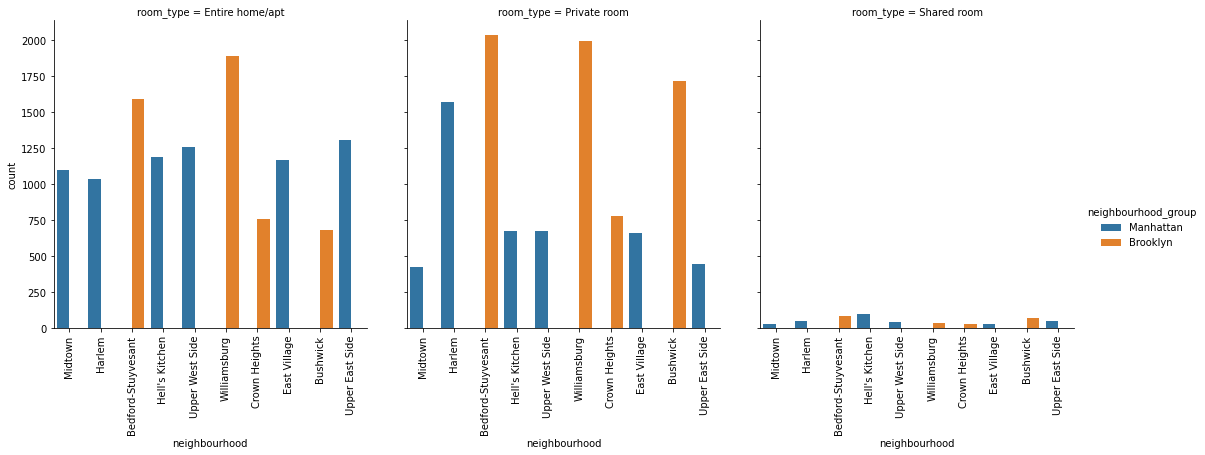

In [49]:
neighb =df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
pl =sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neighb, kind='count')
pl.set_xticklabels(rotation=90)

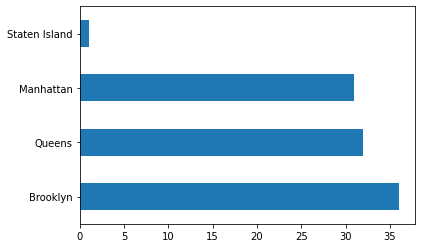

In [50]:
# Rooms with top 100 reviews by neighbourhood
dfr=df.sort_values(by=['number_of_reviews'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we look at the top 100 airbnb's with number of reviews, Brooklyn has highest reviews followed by Queens and then Manhattan.

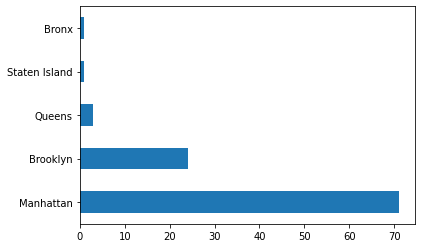

In [51]:
# Rooms with top 100 expensive by neighbourhood
dfr=df.sort_values(by=['price'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we take the top 100 airbnbs then almost 70+ comes in Manhattan, followed by 25 in Brooklyn.

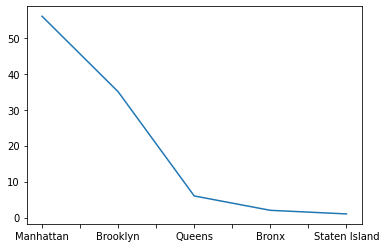

In [52]:
# Rooms with top 100 minimum_nights  by neighbourhood
dfr=df.sort_values(by=['minimum_nights'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot()

Manhattan has highest airbnbs with highest minimum nights.

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

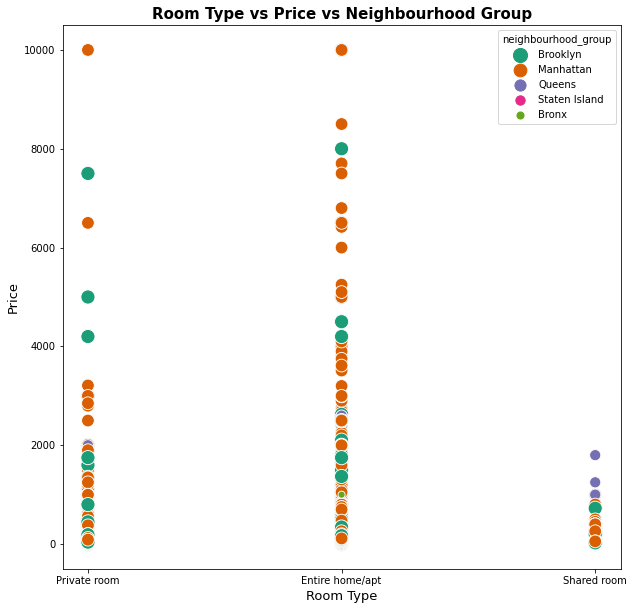

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

### Data Cleaning

We dont require host_id,name,id,host_name and last_review as these do not any way effect for further analysis or pre-processing. So we can drop them.

In [54]:
## We can remove the unwanted columns. Here id,name , host_name and last_review doesnt help us in anyway in our approch for data analysis.
df.drop(['host_id','name','id','host_name','last_review'], axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Since we removed 4 columns from the dataframe, we now have to deal with 12 columns.

In [55]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [56]:
df['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

We can actually fill all the rows of column of reviews_per_month as 0 where its null value, this is because the data is null only because no one has reviewd it and hence the number of review is 0 here.

In [57]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# Missing value implies there are no reviews for the location.

In [58]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In the availablity_365 , if we have 365 days availablity then we can directly assgn them as 365 itself and 0 for rest because they isnt availavle for 365 days.

In [59]:
# We saw that availablity_365 is a bit confusing above. So its better to make all the airbnbs available 365 days as 1 and rest as 0.
df['availability_365'] = df['availability_365'].apply(lambda x: 1 if x == 365 else 0)

#### Availablity based analysis: 

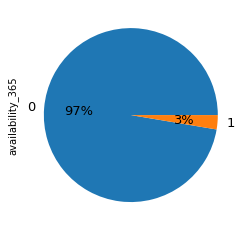

In [60]:
df['availability_365'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

Only 3% airbnbs have 365 days availablity.

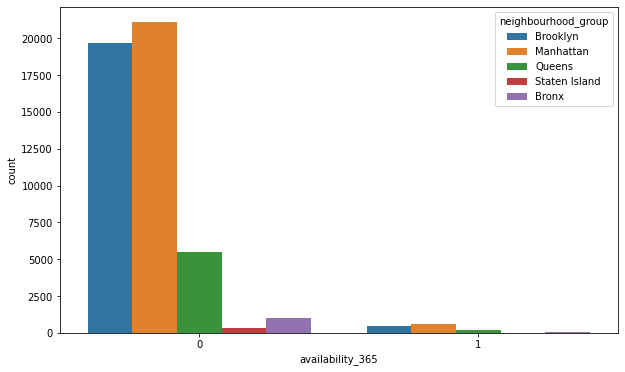

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'availability_365', hue = 'neighbourhood_group')

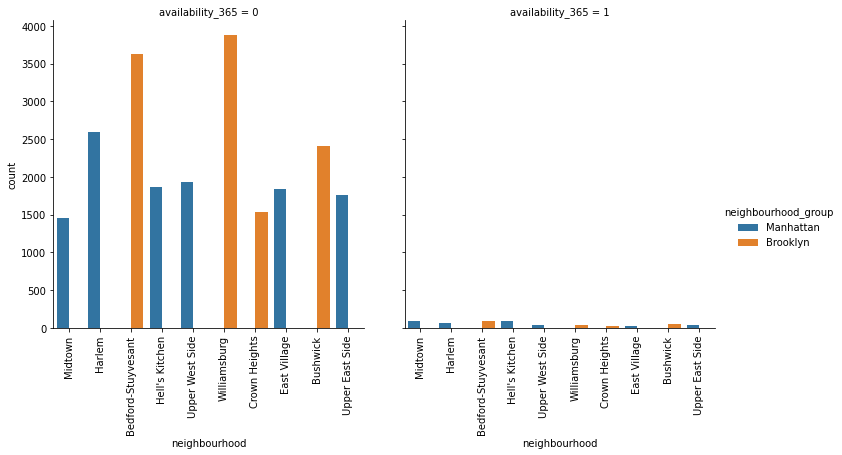

In [62]:
neighb =df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
pl =sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='availability_365', data=neighb, kind='count')
pl.set_xticklabels(rotation=90)

### Encoding

We can use onehotencoding method as all three categorical features are nominal (no ordering). 

In [63]:
def encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [64]:
df = encode(
    df,
    columns=['neighbourhood_group', 'neighbourhood', 'room_type'],
    prefixes=['G', 'N', 'R']
)

In [65]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,G_Bronx,G_Brooklyn,G_Manhattan,G_Queens,G_Staten Island,N_Allerton,N_Arden Heights,N_Arrochar,N_Arverne,N_Astoria,N_Bath Beach,N_Battery Park City,N_Bay Ridge,N_Bay Terrace,"N_Bay Terrace, Staten Island",N_Baychester,N_Bayside,N_Bayswater,N_Bedford-Stuyvesant,N_Belle Harbor,N_Bellerose,N_Belmont,N_Bensonhurst,N_Bergen Beach,N_Boerum Hill,N_Borough Park,N_Breezy Point,N_Briarwood,N_Brighton Beach,N_Bronxdale,N_Brooklyn Heights,N_Brownsville,...,N_Spuyten Duyvil,N_St. Albans,N_St. George,N_Stapleton,N_Stuyvesant Town,N_Sunnyside,N_Sunset Park,N_Theater District,N_Throgs Neck,N_Todt Hill,N_Tompkinsville,N_Tottenville,N_Tremont,N_Tribeca,N_Two Bridges,N_Unionport,N_University Heights,N_Upper East Side,N_Upper West Side,N_Van Nest,N_Vinegar Hill,N_Wakefield,N_Washington Heights,N_West Brighton,N_West Farms,N_West Village,N_Westchester Square,N_Westerleigh,N_Whitestone,N_Williamsbridge,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.00,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,0.00,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48893,40.75751,-73.99112,55,1,0,0.00,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Scaling

Scaling is necessary, as our dataset has now completly turned numerical.

In [66]:
y = df['price'].copy()
X = df.drop('price', axis=1).copy()
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [67]:
X

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,G_Bronx,G_Brooklyn,G_Manhattan,G_Queens,G_Staten Island,N_Allerton,N_Arden Heights,N_Arrochar,N_Arverne,N_Astoria,N_Bath Beach,N_Battery Park City,N_Bay Ridge,N_Bay Terrace,"N_Bay Terrace, Staten Island",N_Baychester,N_Bayside,N_Bayswater,N_Bedford-Stuyvesant,N_Belle Harbor,N_Bellerose,N_Belmont,N_Bensonhurst,N_Bergen Beach,N_Boerum Hill,N_Borough Park,N_Breezy Point,N_Briarwood,N_Brighton Beach,N_Bronxdale,N_Brooklyn Heights,N_Brownsville,N_Bull's Head,...,N_Spuyten Duyvil,N_St. Albans,N_St. George,N_Stapleton,N_Stuyvesant Town,N_Sunnyside,N_Sunset Park,N_Theater District,N_Throgs Neck,N_Todt Hill,N_Tompkinsville,N_Tottenville,N_Tremont,N_Tribeca,N_Two Bridges,N_Unionport,N_University Heights,N_Upper East Side,N_Upper West Side,N_Van Nest,N_Vinegar Hill,N_Wakefield,N_Washington Heights,N_West Brighton,N_West Farms,N_West Village,N_Westchester Square,N_Westerleigh,N_Whitestone,N_Williamsbridge,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,-1.493849,-0.437652,-0.293996,-0.320414,-0.551511,-0.034716,6.062735,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-0.029321,-0.009045,-0.020729,-0.039715,-0.136938,-0.01865,-0.037864,-0.053778,-0.011078,-0.006396,-0.011966,-0.028254,-0.01865,-0.286710,-0.012792,-0.016924,-0.022161,-0.039195,-0.014303,-0.060276,-0.052813,-0.007833,-0.033862,-0.039195,-0.019716,-0.05621,-0.035343,-0.011078,...,-0.009045,-0.039456,-0.031347,-0.023506,-0.027519,-0.086485,-0.089668,-0.076974,-0.022161,-0.009045,-0.029321,-0.011966,-0.015001,-0.060276,-0.038402,-0.011966,-0.020729,-0.195388,-0.204949,-0.015001,-0.026379,-0.031994,-0.13686,-0.01919,-0.006396,-0.126324,-0.014303,-0.006396,-0.015001,-0.028614,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
1,0.452436,-0.684639,-0.293996,0.487665,-0.445079,-0.156104,-0.164942,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,-0.029321,-0.009045,-0.020729,-0.039715,-0.136938,-0.01865,-0.037864,-0.053778,-0.011078,-0.006396,-0.011966,-0.028254,-0.01865,-0.286710,-0.012792,-0.016924,-0.022161,-0.039195,-0.014303,-0.060276,-0.052813,-0.007833,-0.033862,-0.039195,-0.019716,-0.05621,-0.035343,-0.011078,...,-0.009045,-0.039456,-0.031347,-0.023506,-0.027519,-0.086485,-0.089668,-0.076974,-0.022161,-0.009045,-0.029321,-0.011966,-0.015001,-0.060276,-0.038402,-0.011966,-0.020729,-0.195388,-0.204949,-0.015001,-0.026379,-0.031994,-0.13686,-0.01919,-0.006396,-0.126324,-0.014303,-0.006396,-0.015001,-0.028614,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
2,1.468399,0.222497,-0.196484,-0.522433,-0.682986,-0.186451,6.062735,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,-0.029321,-0.009045,-0.020729,-0.039715,-0.136938,-0.01865,-0.037864,-0.053778,-0.011078,-0.006396,-0.011966,-0.028254,-0.01865,-0.286710,-0.012792,-0.016924,-0.022161,-0.039195,-0.014303,-0.060276,-0.052813,-0.007833,-0.033862,-0.039195,-0.019716,-0.05621,-0.035343,-0.011078,...,-0.009045,-0.039456,-0.031347,-0.023506,-0.027519,-0.086485,-0.089668,-0.076974,-0.022161,-0.009045,-0.029321,-0.011966,-0.015001,-0.060276,-0.038402,-0.011966,-0.020729,-0.195388,-0.204949,-0.015001,-0.026379,-0.031994,-0.13686,-0.01919,-0.006396,-0.126324,-0.014303,-0.006396,-0.015001,-0.028614,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
3,-0.803398,-0.164450,-0.293996,5.538156,2.221978,-0.186451,-0.164942,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-0.029321,-0.009045,-0.020729,-0.039715,-0.136938,-0.01865,-0.037864,-0.053778,-0.011078,-0.006396,-0.011966,-0.028254,-0.01865,-0.286710,-0.012792,-0.016924,-0.022161,-0.039195,-0.014303,-0.060276,-0.052813,-0.007833,-0.033862,-0.039195,-0.019716,-0.05621,-0.035343,-0.011078,...,-0.009045,-0.039456,-0.031347,-0.023506,-0.02